In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


<Axes: xlabel='NumOfProducts', ylabel='Balance'>

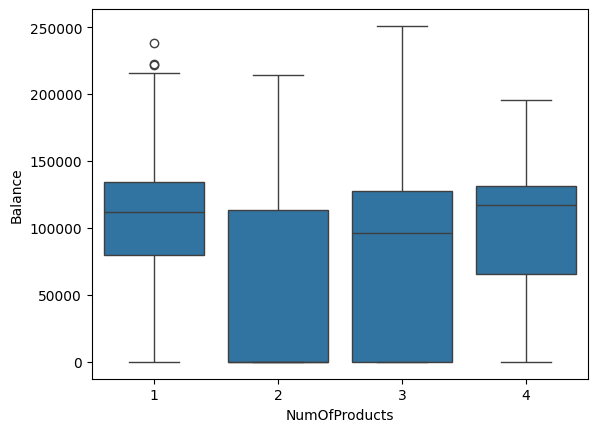

In [ ]:
# @title Account Balance vs Number of Products

sns.boxplot(x = "NumOfProducts", y = "Balance", data = df)

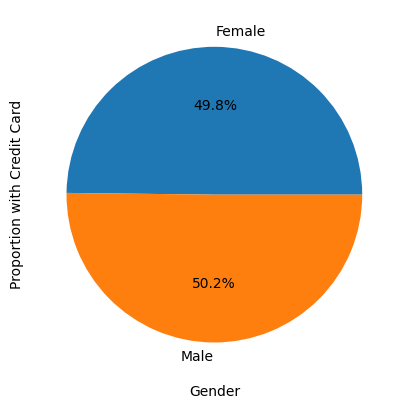

In [ ]:
# @title Proportion of Customers with Credit Card by Gender

import matplotlib.pyplot as plt
df.groupby('Gender')['HasCrCard'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Gender')
_ = plt.ylabel('Proportion with Credit Card')

<Axes: xlabel='Age', ylabel='Count'>

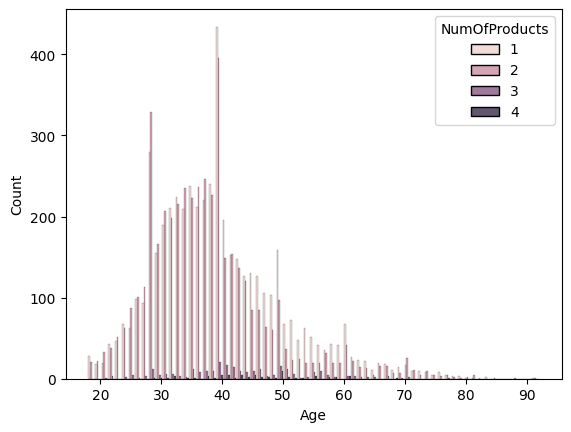

In [ ]:
# @title NumOfProducts vs Age

sns.histplot(x = "Age", hue = "NumOfProducts", data=df, multiple="dodge")

<Axes: ylabel='count'>

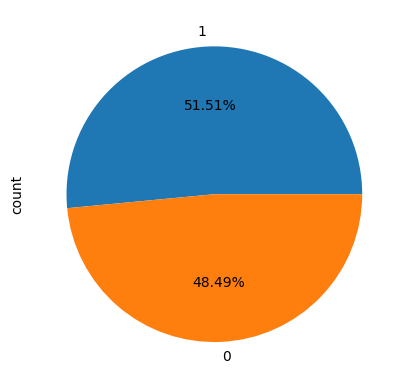

In [ ]:
# @title Active vs Inactive Members

df['IsActiveMember'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: xlabel='Tenure', ylabel='EstimatedSalary'>

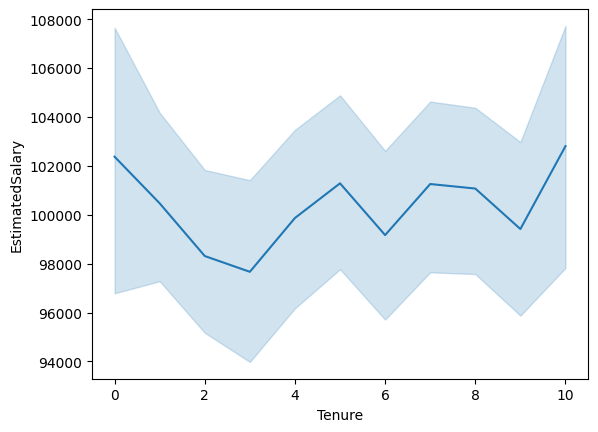

In [ ]:
# @title Tenure vs Estimated Salary

sns.lineplot(data=df, x='Tenure', y='EstimatedSalary')

<Axes: title={'center': 'EstimatedSalary'}, xlabel='Card Type'>

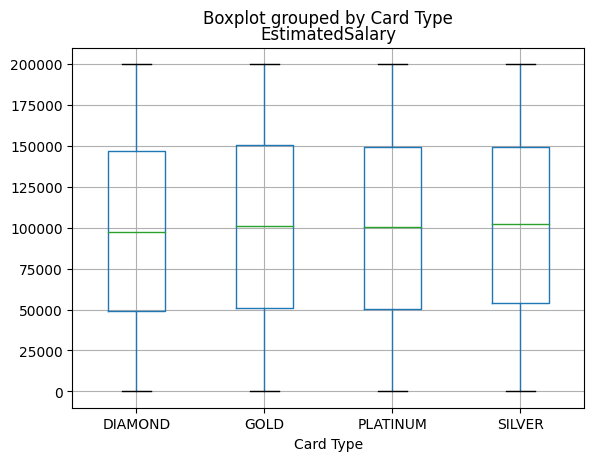

In [ ]:
# @title Average Estimated Salary by Card Type

df.boxplot(column='EstimatedSalary', by='Card Type')

<Axes: xlabel='Age'>

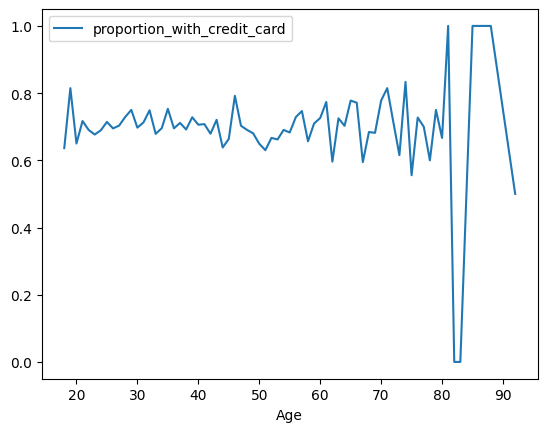

In [ ]:
# @title Proportion of Customers with Credit Card by Age

import pandas as pd
df.groupby("Age").agg(proportion_with_credit_card=pd.NamedAgg(column="HasCrCard", aggfunc="mean")).plot.line()

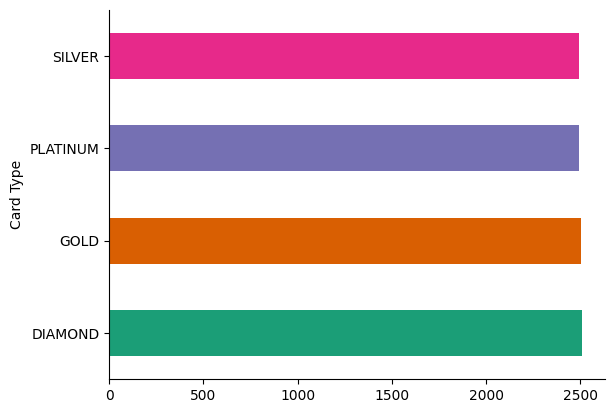

In [ ]:
# @title Card Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Card Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

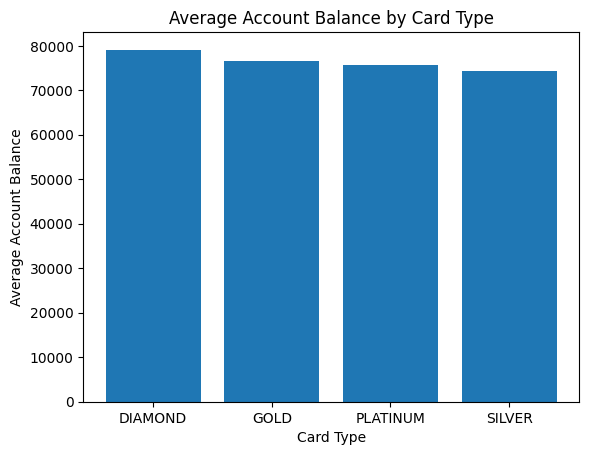

In [ ]:
# @title Average Account Balance by Card Type

import matplotlib.pyplot as plt

plt.bar(df.groupby('Card Type')['Balance'].mean().index, df.groupby('Card Type')['Balance'].mean())
plt.xlabel('Card Type')
plt.ylabel('Average Account Balance')
_ = plt.title('Average Account Balance by Card Type')


<Axes: xlabel='Age', ylabel='NumOfProducts'>

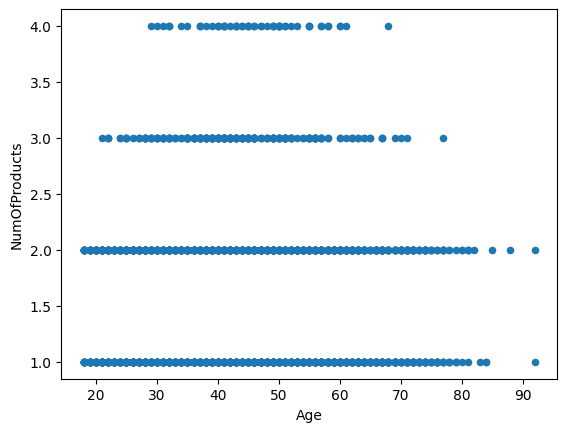

In [ ]:
# @title Number of Products by Age

df.plot.scatter(x='Age', y='NumOfProducts')

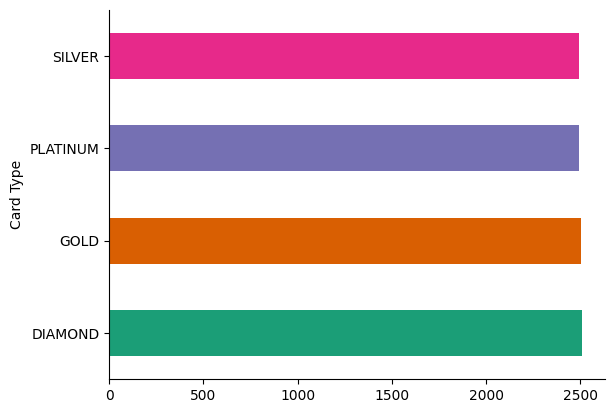

In [ ]:
# @title Card Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Card Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

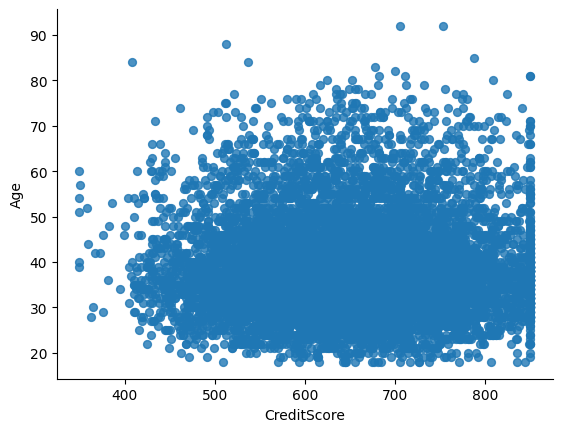

In [ ]:
# @title CreditScore vs Age

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

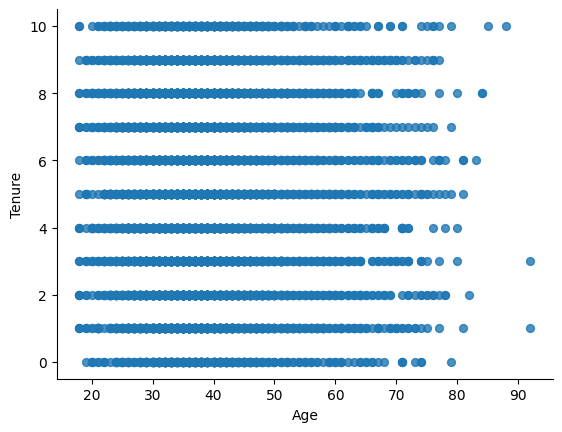

In [ ]:
# @title Age vs Tenure

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

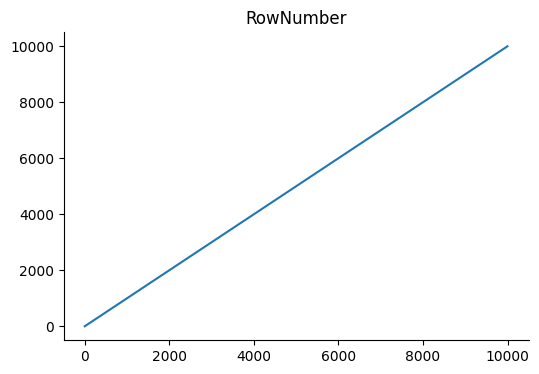

In [ ]:
# @title RowNumber

from matplotlib import pyplot as plt
df['RowNumber'].plot(kind='line', figsize=(6, 4), title='RowNumber')
plt.gca().spines[['top', 'right']].set_visible(False)

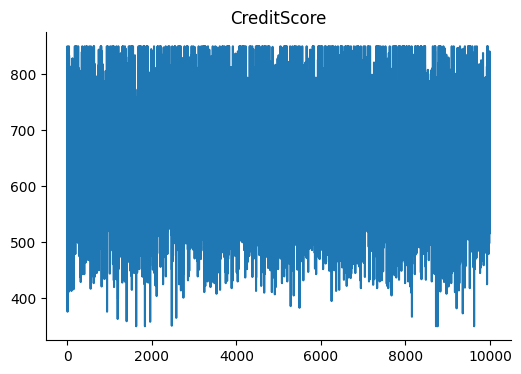

In [ ]:
# @title CreditScore

from matplotlib import pyplot as plt
df['CreditScore'].plot(kind='line', figsize=(6, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

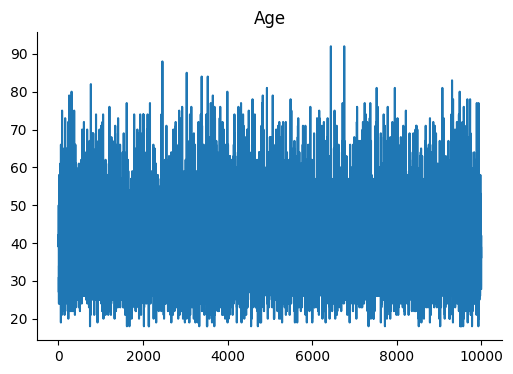

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(6, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

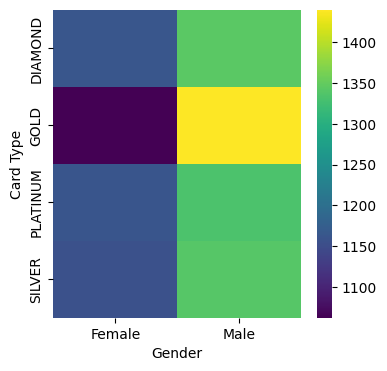

In [ ]:
# @title Gender vs Card Type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Card Type'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Card Type')

<ipython-input-46-ff02ede145e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='RowNumber', y='Card Type', inner='box', palette='Dark2')


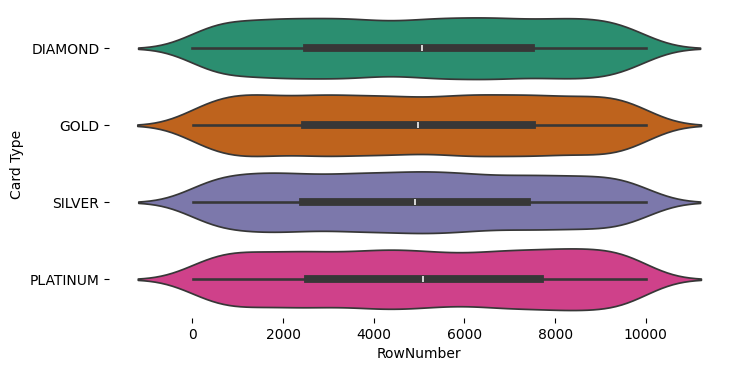

In [ ]:
# @title Card Type vs RowNumber

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (8, 1 * len(df['Card Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='RowNumber', y='Card Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-45-b728fc823f16>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='CustomerId', y='Geography', inner='box', palette='Dark2')


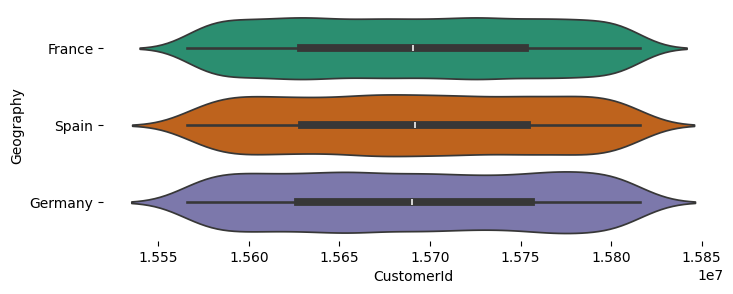

In [ ]:
# @title Geography vs CustomerId

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (8, 1 * len(df['Geography'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CustomerId', y='Geography', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'Card Type'], axis=1)
data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

CustomerId            0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Point Earned          0
dtype: int64

In [ ]:
data.shape

(10000, 13)

In [ ]:
threshold_balance = data["Balance"].mean()
threshold_active = data["IsActiveMember"].mean()




def create_purchase_label(row):
    if row['IsActiveMember'] > threshold_active and row['Balance'] > threshold_balance:
        return 1
    else:
        return 0

In [ ]:
data['PurchaseLabel'] = data.apply(create_purchase_label, axis=1)

In [ ]:
print(data[['Balance', 'IsActiveMember', 'PurchaseLabel']])

        Balance  IsActiveMember  PurchaseLabel
0          0.00               1              0
1      83807.86               1              1
2     159660.80               0              0
3          0.00               0              0
4     125510.82               1              1
...         ...             ...            ...
9995       0.00               0              0
9996   57369.61               1              0
9997       0.00               1              0
9998   75075.31               0              0
9999  130142.79               0              0

[10000 rows x 3 columns]


In [ ]:
(data['PurchaseLabel']).sum()

3016

In [ ]:
y = data['PurchaseLabel']
x = data.drop(['PurchaseLabel'] , axis=1 )

In [ ]:
x.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


<Axes: xlabel='Tenure', ylabel='Count'>

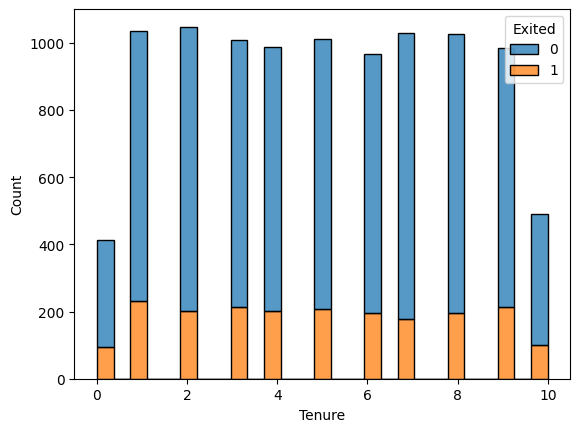

In [ ]:
# @title Tenure Distribution by Exit Status

sns.histplot(x = 'Tenure', hue = 'Exited', data = df, multiple = 'stack')

<Axes: xlabel='HasCrCard', ylabel='Age'>

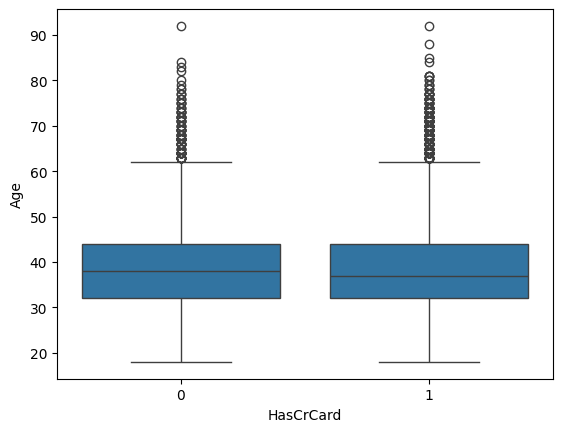

In [ ]:
# @title Has Credit Card by Age

sns.boxplot(data=df, x='HasCrCard', y='Age')

In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: PurchaseLabel, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997142857142857


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2426
           1       1.00      1.00      1.00      1074

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=x.columns, class_names=["No", "Yes"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'